### Buffon's needle - ingested.
##### In the excitement of calculating $\pi$, Mr Buffon (no relation) inadvertently swallows the needle and is X-rayed. If the needle exhibits no preference for direction in the gut, what is the distribution of the length of its image on the X-ray plate? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

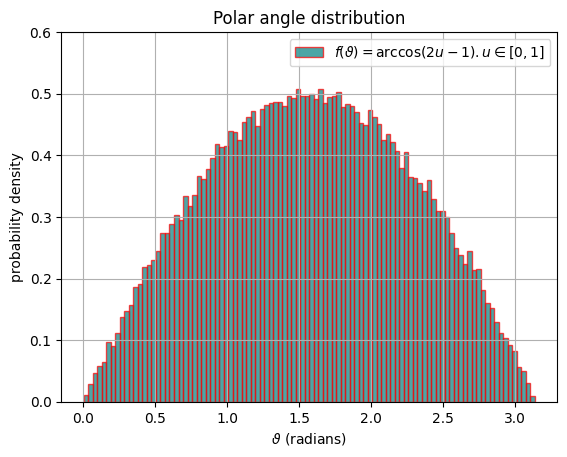

In [30]:
# assume a needle with length 1 in arbitrary units
needle_length = 1
# assuming the x-ray scanner is parallel to the x-y plane, the polar angle between the needle and the z-axis
# fully determines the projected length of the needle.
# theta must be distributed as arccos(2u - 1) where u is a random number between 0 and 1
# for the needle tips to be uniformly distributed across the surface of a sphere of radius needle_lenght/2.
# let's simulate theta N times in radians

def generate_theta(N):
    u = np.random.rand(N)
    return np.arccos(2*u - 1)

# let's generate N thetas and plot the histogram
N = 100000
thetas = generate_theta(N)

plt.hist(thetas, bins=100, density=True, color='teal',edgecolor='red', alpha=0.7, label=r'$f(\vartheta)=$arccos$(2u-1). u\in[0,1]$')
plt.xlabel(r'$\vartheta$ (radians)')
plt.ylabel('probability density')
plt.title('Polar angle distribution')
plt.legend()
plt.grid('both')
plt.ylim(0, .6)
plt.show()

/var/folders/3q/xslffcls5g510g4279j_r_680000gn/T/ipykernel_96419/3521754350.py:6: RuntimeWarning: divide by zero encountered in divide
  return x/np.sqrt(1 - (x)**2)


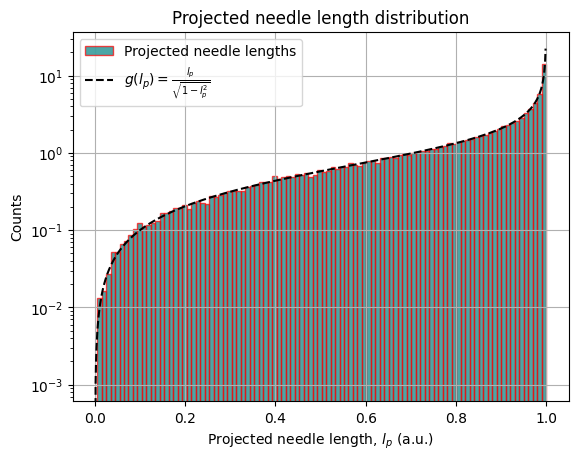

In [38]:
# now let's calculate the projected length of the needle
needle_lengths_projected = needle_length * np.sin(thetas)

# this is the analytical form of the distribution of the projected lengths - see notes below
def length_distribution(x):
    return x/np.sqrt(1 - (x)**2)

# let's plot the histogram of the projected lengths
plt.hist(needle_lengths_projected, bins=100, density=True, color='teal', edgecolor='red', alpha=0.7, label='Projected needle lengths')
plt.plot(np.linspace(0, needle_length, 1000), length_distribution(np.linspace(0, needle_length, 1000)), 'k--', label=r'$g(l_p)=\frac{l_p}{\sqrt{1-l_p^2}}$')
plt.xlabel(r'Projected needle length, $l_p$ (a.u.)')
plt.ylabel('Counts')
plt.title('Projected needle length distribution')
plt.legend()
plt.yscale('log')
plt.grid('both')
plt.show()


##### Let's derive the analytical expression for the distribution of the projected length of the needle: $g(l_p) = l_p/\sqrt(1-l_p^2)$. To extract the pdf of the random variable $l_p = \sin(\arccos(2u - 1))$, where $u$ is uniformly distributed between 0 and 1, we need to consider the transformation and its derivative.
$$ l_p = \sin(\vartheta) = \sqrt{1 - \cos^2(\vartheta)} = \sqrt{1 - (2u - 1)^2} $$
$$ u(l_p) = \frac{1}{2} \bigg(\sqrt{1-l_p^2}+1\bigg) $$
##### The derivative of $u$ with respect to $l_p$, which represents the PDF of $l_p$, is found to be:
$$ \bigg|\frac{d}{dl_p}u(l_p)\bigg| = \frac{l_p}{2\sqrt{1 - l_p^2}} \sim g(l_p) $$
##### Note: if I have time I will figure out where the addiitional factor 1/2 comes from, but I suspect it's from taking the positive solution only to $\sin(\vartheta) = \pm\sqrt{1 - \cos^2(\vartheta)}$.